# Data visualization with Matplotlib/ggplot

#### Table of contents
0. Why bother using ggplot/Seaborn?
1. A brief introducion to ggplot
2. A breif introduction to Seaborn
3. Comparing Matplotlib with ggplot/Seaborn
4. Conclusion: Pros and Cons of different plotting package


The first part of this tutorial is introducing ggplot. The second part of this tutorial is introducing seaborn. The third part of this tutorial is comparing Matplotlib with ggplot/Seaborn. In the last part, I will mention when and why, you would prefer Matplotlib/ggplot/Seaborn.

For Matplotlib user, this tutorial will introduce you to ggplot and Seaborn. I will give you some scenario and example when and why sometimes you would prefer using ggplot/Seaborn instead of matplotlib.

For R user, this tutorial will help you migrate from ggplot to Matplotlib. You might already be very familiar to ggplot syntax, but there are some syntax difference between real ggplot2 in R and ggplot in python. The main difference will be covered in the tutorial. By going through the second part of this tutorial, you will have a deeper understanding of the different design philosophy behind Matplotlib and ggplot. Hopefully, this tutorial can also help you understanding matplotlib better. 

# Why bother using ggplot/Seaborn?
Most python users are familiar with Matplotlib. Matplotlib is powerful enough, why bother using ggplot or Seaborn? That is because, in some senarios, Matplotlib code is cumbersome, you have to do a lot work to make it right. 

# Introduction to ggplot
> ggplot is a plotting system for Python based on R's ggplot2 and the [Grammar of Graphics](http://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448). It is built for making profressional looking, plots quickly with minimal code.

> ggplot is not a good fit for people trying to make highly customized data visualizations. While you can make some very intricate, great looking plots, ggplot sacrafices highly customization in favor of generall doing "what you'd expect".

Some useful link:
- [official website of ggplot](http://ggplot.yhathq.com/)
- [Github repo](https://github.com/yhat/ggplot)
- [ggplot for python](http://www.slideshare.net/Yhat/ggplot-for-python)
- [A Dramatic Tour through Python’s Data Visualization Landscape (including ggplot and Altair)](https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/). This lecture compared 4 distinctive visualizing tools in python. I found it extremely useful. 
- [A slide introducing ggplot in python](http://www.slideshare.net/Yhat/ggplot-for-python)
- [R for data science](http://r4ds.had.co.nz/data-visualisation.html). This is a R doc, but ggplot in python is nearly a copy of ggplot of R, referencing to some R doc might be helpful.


## Installation
To install the ggplot, type the following line in your console.  

```bash
pip install ggplot
```

Note: You may try to install ggplot using `conda install ggplot`, however this will fail because ggplot is not officially included in the conda. Install it using `pip` is recommended.

## ggplot sketch
First, let's make up a dataset. To have a idea about this data set, see the output of the `dat.head()`.

In [2]:
d = {'xvar': range(20) + np.random.normal(0, 3, 20), 
     'yvar': range(20) + np.random.normal(0, 3, 20), 
     'cond': ['A']*10 + ['B']*10}
dat = pd.DataFrame(d)
dat.head()

,cond,xvar,yvar
0,A,-4.028001,0.151113
1,A,-2.033802,3.755766
2,A,1.417906,2.483318
3,A,4.937508,4.054084
4,A,1.611261,1.770483


Next, let's start with the simplest case, draw scatterplots! This make a scatter point for you:
```python
ggplot(dat, aes(x='xvar', y='yvar')) + geom_point()
```


For R user, this code must look very familiar to you. But note that, column name needs to be quoted, it passed as a string in python.

For Matplotlib, you may found this line of code really wired! Let me explain this to you in details. The way that ggplot construct a graph is to add different layers to the graph.

`ggplot()` defines the base layer components of our chart. We can make complex graphics by adding more layers on the base graph.

`ggplot()` have 2 argument:
1. The data for the plot (the data frame being used)
2. How your data will relate to your plots, like x axis, y axis; size, color, shape of the points (the [aesthetics](https://github.com/yhat/ggplot/blob/master/docs/plotting/aesthetics.ipynb) [2](http://r4ds.had.co.nz/data-visualisation.html#aesthetic-mappings))

`ggplot` use layers to build up the plot. After setting up the base layer using `ggplot(dat, aes(x='xvar', y='yvar'))`, we will show the scatter point by adding a `geom_point()` layer. `geom_point()` adds a layer of points to the base graph. 

There are a lot of very convenient statistic graph that you can plot by using ggplot. For example, I have listed some very handy function that you can add to your base layer. 



In [3]:
# plot a histogram
ggplot(dat, aes(x='xvar', y='yvar')) + geom_histogram();

In [4]:
# plot a line
ggplot(dat, aes(x='xvar', y='yvar')) + geom_line();

In [5]:
# plot scatter points
ggplot(dat, aes(x='xvar', y='yvar')) + geom_point();

#### Adding a linear regression line
Let's try more to add a linear regression line. To do this, just add a `stat_smooth(method='lm')` layer. 

`'lm'` means 'linear regression'. By default, this will includes 95% confidence region, as shown as the shaded area.
We can also plot without the shadded confidence interval. To do this, set `se='false'`.

In [6]:
ggplot(dat, aes(x='xvar', y='yvar')) + geom_point() + stat_smooth(method='lm');
ggplot(dat, aes(x='xvar', y='yvar')) + geom_point() + stat_smooth(method='lm', se='false');

Now, how to give different scatter point different color depending on their attributes? In ggplot, you can color/shape by an variable.

In [7]:
ggplot(dat, aes(x='xvar', y='yvar', color='cond')) + geom_point();

We can also plot different regression line based on the color.

In [8]:
ggplot(dat, aes(x='xvar', y='yvar', color='cond'))\
        + geom_point()\
        + stat_smooth(method='lm', fullrange='true');

In ggplot, you can assign the layer that `ggplot()` returns to a variable, and adding new attributes to this layer. Let me illustrate it with following example:

In [9]:
# Assign the object that `ggplot()` returns to a variable
dia = ggplot(diamonds, aes(x='clarity', y='price'))

## Add a title:
dia + geom_boxplot() + ggtitle("Diamond");

## If the title is long, it can be split into multiple lines with \n
dia + ggtitle("Diamond\nThis is a very long title");

## Change background to white
dia + ggtitle("Diamond\nThis is a very long title") +  theme_bw();

# Change Axes names  
dia + xlab("new X axis name") + ylab("new Y axis name"); # change x, y axes names


# Brief introduction to Seaborn

Installation:
```
conda install seaborn
```

There are tons of documentation of seaborn online. Here are some resources I found most useful:


The world is wonderful with small dataset. However, what will happen if we have to plot on large data set? How to automatic scale becomes important.

In Matplotlib, you can plot multiple histogram by looping. This is a code for plotting multiple histogram. It comes from the official Matplolib webiste [3](http://matplotlib.org/examples/statistics/histogram_demo_multihist.html)

# Senario 1: Student Grade Distribution

Suppose you want to know the distribution of student's grade. The example data is:

In [38]:
edu = pd.read_csv('tutorial_edu.csv')
print len(edu)
edu.head()

50


,M1,M2,P1,P2,F,Total
0,86.122760,72.619969,45.086135,56.668942,95.0,71.0
1,85.478777,72.189228,66.944689,89.068604,85.0,75.0
2,87.149706,64.860001,51.437478,67.307984,4.0,39.0
3,75.429333,89.181503,61.420725,84.095960,20.0,38.0
4,84.529962,73.596047,56.968285,94.492386,86.0,63.0


This is a grade data of 400 student. M1, M2 is grade of 2 midterms. P1, P2 is grade of 2 programming assignments. F is grade of final exam. 

What is distribution of student's grade on M1, M2, P1, P2, F, respectively? We can answer this quesiton by draw a Histogram. 

## Histogram in `matplotlib`

Let's draw it in Matplotlib first. This is the matplotlib hist api link [hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). For you convenience, this is the api signature:

    matplotlib.pyplot.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)

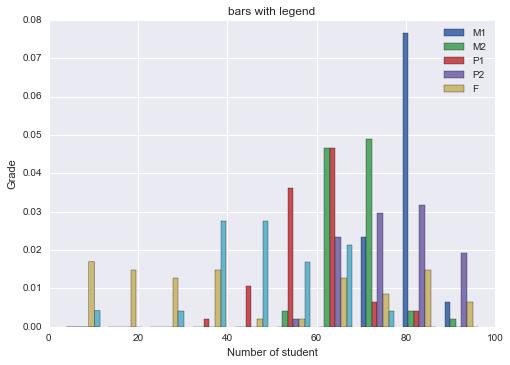

In [39]:
n_bins = 10
labels = ['M1', 'M2', 'P1', 'P2', 'F']

plt.hist(edu.values, bins=n_bins, normed=1, histtype='bar', label=labels) # using the default color
plt.title('bars with legend')
plt.xlabel('Number of student')
plt.ylabel('Grade')
plt.legend()

This is the default argument that we are implicitly pass to the hist funciton:

#####################

Note about `legend()`: To use the legend, we have to pass `label` argument for the graph. That means, we can't use the default color of `hist`, we have to explicitly pass the `color` and `label` to the `hist` function.


What if I don't want to use the default color? The following program demonstrates how to explicitly set the color. To keep the code short, I will skip setting the `title`, `xlabel` and `ylabel`.

## Color scheme in `matplotlib`

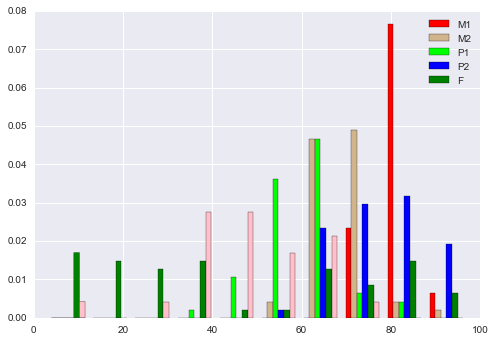

In [40]:
# setting self defined color
colors = ['red', 'tan', 'lime', 'blue', 'green', 'pink']

labels = ['M1', 'M2', 'P1', 'P2', 'F']
plt.hist(edu.values, bins=10, normed=1, histtype='bar', color=colors, label=labels) # using the default color
plt.legend()
plt.show()

Yes, I hear you crying. "OMG. This graph is toooo ugly!! How can you picked those ugly colors?".

Colors is important. In matplotlib, there are some ways that you can automaticlly generate colors for your graph. So far, I've found 2 way to let the matplotlib auto scale the color.

1. Using `colormap`. [Reference link to colormap](http://matplotlib.org/examples/color/colormaps_reference.html). You can choose a lot of color style from it. 
2. Using `stylesheet`. [stylesheet guide](http://matplotlib.org/users/style_sheets.html). The most common style would be `ggplot` and `seaborn`.

The following 2 programs demonstrates how to use colormap and style sheet. To keep the code short, I will skip setting the `title`, `xlabel` and `ylabel`.

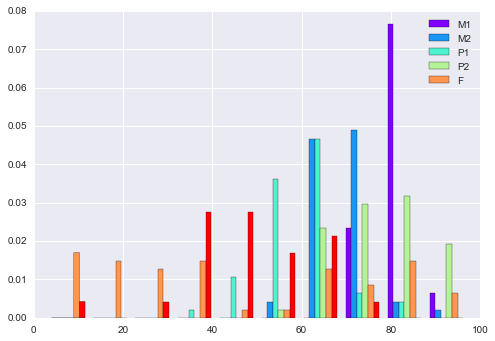

In [41]:
# Old way: setting 6 color
# colors = ['red', 'tan', 'lime', 'blue', 'green', 'pink']

# New way: using the colormap to automaticlly scale the color
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 6))
# Please try the following colors!
# colors = cm.autumn(np.linspace(0, 1, 6))
# colors = cm.gist_earth(np.linspace(0, 1, 6))

labels = ['M1', 'M2', 'P1', 'P2', 'F']
plt.hist(edu.values, bins=10, normed=1, histtype='bar', color=colors, label=labels) # using the default color
plt.legend()

To know the style available, use `print(plt.style.available)`.

```python
print(plt.style.available)
[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']
```

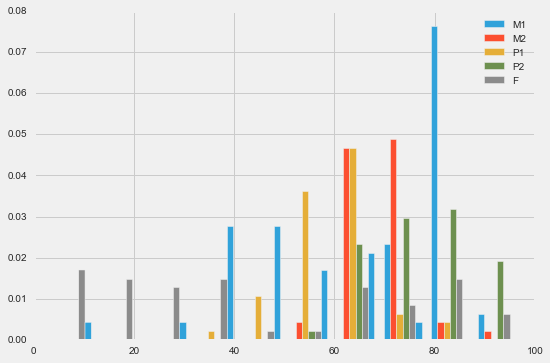

In [42]:
# Please try those different color styles

# plt.style.use('ggplot')
# plt.style.use('classic')
# plt.style.use('bmh')
# plt.style.use('seaborn-pastel')
# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-colorblind')
# plt.style.use('fivethirtyeight')

labels = ['M1', 'M2', 'P1', 'P2', 'F']
with plt.style.context(('fivethirtyeight')):
    plt.hist(edu.values, bins=10, normed=1, histtype='bar', label=labels) # using the default color
plt.legend()

## Plot multiple Graph in `matplotlib`
In the above example, it would be much better if we can plot the distribution of each exam in the different graph. To plot multiple graph, we can use [`subplot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot) command. Typical call signature is:
```python
subplot(nrows, ncols, plot_number)
```
A most common usage would be:
```python
fig, axes = plt.subplots(nrows=2, ncols=2)
```
Since we are plotting a 2x2 grid, our axe is 2x2
```python
print axes
[[<matplotlib.axes._subplots.AxesSubplot object at 0x11ca1b090>
  <matplotlib.axes._subplots.AxesSubplot object at 0x11d1d5450>]
 [<matplotlib.axes._subplots.AxesSubplot object at 0x11d73c210>
  <matplotlib.axes._subplots.AxesSubplot object at 0x11d7a7710>]]
```

In [43]:
# edu.M1 = np.random.normal(80,5,50)
# edu.M2 = np.random.normal(70,6.5,50)
# edu.P1 = np.random.normal(60,8,50)
# edu.P2 = np.random.normal(80,10,50)
# edu.to_csv('tutorial_edu.csv', index=False)

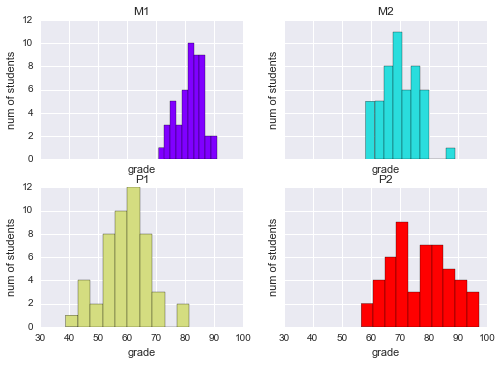

In [47]:
nrows = 2
ncols = 2
n_bins = 10

# we have to set sharex and sharey to make the subplot share the axis
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
axes_flat = axes.flat
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 4))

for i in range(nrows*ncols):
    axes_flat[i].hist(edu.iloc[:, [i]].values, n_bins, histtype='bar', color=colors[i])
    axes_flat[i].set(xlabel='grade', ylabel='num of students' ,title=edu.columns[i])
axes_flat[0].legend(prop={'size': 10})

## Color, histogram in `ggplot`

Ok, now let me try to handle histogram, color, legend in ggplot. Plotting multiple histograms in ggplot is as easy as pie. We can easily plot multiple chart by using the `facet_wrap()`. 

Compare to `matplotlib`, `ggplot` have several advantages:

* No loop needed. (in matplotlib we have to loop through all the subplots)
* No need to consider number of columns, number of rows to use. 
* No need to think about what next color to choose. (in matplotlib we have set color for each subplot)
* Legend and title for each graph are set automaticlly. (in matplotlib we have set `legend()`)
* x and y axis scaled automaticlly for all the graph. (in matplotlib we have set `sharex` and `sharey`)

As you can see, `ggplot` automaticlly handles everything for us. However, there are no free lunch. Instead of passing the original `edu` dataframe, we are passing `pd.melt(edu)` here to `ggplot`. Please have a look and `pd.melt()` function, and you will understand why we are doing this transformation.

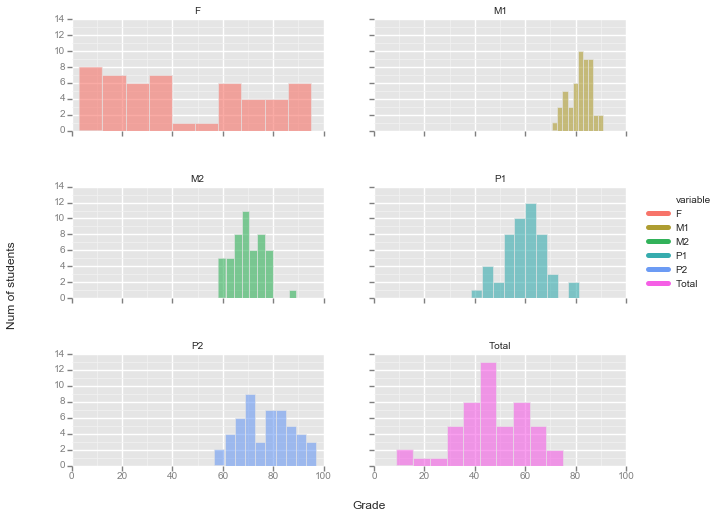

<ggplot: (313165033)>

In [67]:
ggplot(pd.melt(edu), aes(x='value', fill='variable')) + \
        geom_histogram(alpha=0.6) + \
        facet_wrap('variable') + \
        xlab("Grade") + \
        ylab("Num of students")

We can also plot a density line:

In [65]:
ggplot(pd.melt(edu), aes(x='value', color='variable')) + geom_density(binwidth=10);

Changing the color style in ggplot is also easy. Just add a color layer to your current layer. For example, add a `scale_color_brewer()` or `scale_color_gradient()` layer.

Try colors in this [link](http://ggplot.yhathq.com/docs/index.html), they are really pretty.

* [`scale_color_brewer()`](http://ggplot.yhathq.com/docs/scale_color_brewer.html),
* [`scale_color_gradient()`](http://ggplot.yhathq.com/docs/scale_color_gradient.html)

In [64]:
ggplot(pd.melt(edu), aes(x='value', color='variable')) + \
    geom_density(binwidth=10) + \
    scale_color_brewer(type='qual');
    
ggplot(pd.melt(edu), aes(x='value', color='variable')) + \
    geom_density(binwidth=10) + \
    scale_color_brewer(type='div', palette=2);

## Plot multiple Graph in `seaborn`

## Plot multiple Graph in `ggplot`

# Senario 2: Iris Data
## Suppose you want to plot the histogram depends on different value of one column

Take "Iris" dataset for example. The question we are asking is: "How to plot the histogram based on different species?"

The example data type would be:

In [20]:
# sepalLength,sepalWidth,petalLength,petalWidth,species
iris = pd.read_csv('iris.csv')
iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# To plot a histogram in ggplot
ggplot(iris, aes(x='sepalLength', color='species', fill='species')) + geom_histogram(alpha=0.6);
# Histogram is not visually very useful, I prefer using a density function instead.
ggplot(iris, aes(x='sepalLength', color='species', fill='species')) + geom_density();

To do this in `matplotlib`, we need to use a loop.

In [22]:
# for specie in iris.species.unique():
#     plt.hist(iris[iris.species == specie].sepalLength, histtype='bar') # using the default color
    
# plt.title('bars with legend')
# plt.xlabel('Number of student')
# plt.ylabel('Grade')
# plt.legend()

# Conclusion


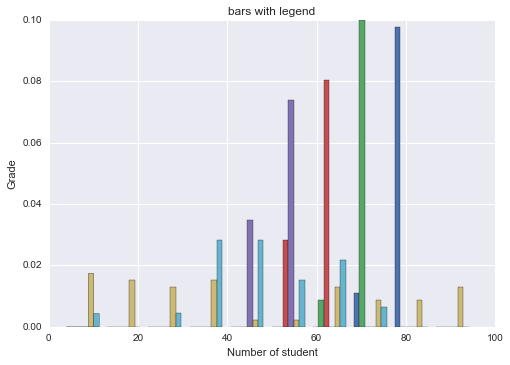

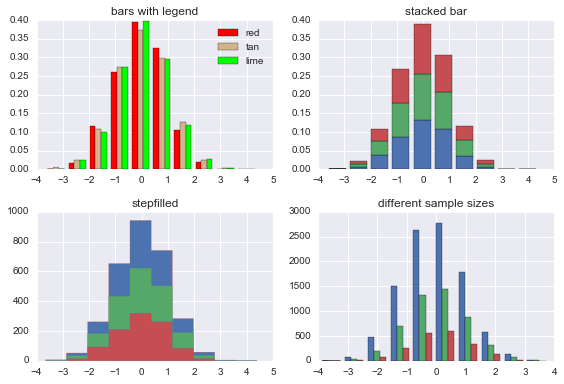

In [23]:
n_bins = 10
colors = ['red', 'tan', 'lime', 'blue', 'green', 'pink']
fig, axe = plt.subplots()

axe.hist(edu.values, bins=n_bins, normed=1, histtype='bar') # using the default color
# If we cant to 
# axe.legend(handles=[histog])  # not sure how to use legend
axe.set_title('bars with legend')
axe.set_xlabel('Number of student')
axe.set_ylabel('Grade')
axe.legend()

# It took me for a while to figure out how to show the legens
# axe.legend(handles=[histog])
axe.legend()

"""
    * Use of legend with multiple sample sets
    * Stacked bars
    * Step curve with a color fill
    * Data sets of different sample sizes
"""
n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=True)
ax2.set_title('stepfilled')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

plt.tight_layout()
plt.show()

# Scenario 1: Time Series - plot_trip() in HW2
# Scenario 2: Scatter point - plotting large twitter data
# Scenario 3: Plotting Multiple Histogram

Yes, `stylesheet` is such a rescue! I can automaticlly rendered our graph so beautiful, so we can focus on producing the content, instead of wasting our time find the good looking colors for our graph. We can also copy the colors used in `ggplot` style and save it for later use. To do this, we need to dive deeper into `plt.rcParams`. Below is a demonstration. You can skip this part the first time you read this.

```python
plt.style.use('ggplot')
# print plt.rcParams
colors = [v['color'] for v in plt.rcParams['axes.prop_cycle']][:6]
print colors

labels = ['M1', 'M2', 'P1', 'P2', 'F']
plt.hist(edu.values, bins=10, normed=1, histtype='bar', color=colors, label=labels) # using the default color
plt.legend()
plt.show()
```